<a href="https://colab.research.google.com/github/spdr-lily/Data-Science-Profile/blob/main/PLN_agrupamento_de_documentos_e_nuvem_de_palavras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de Linguagem Natural
Agrupamento de Documentos e Nuvem de Palavras

# Processando o dataset

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("https://github.com/alvelvis/data-movies-willianoliveiragibin/raw/main/data-willianoliveiragibin.csv", index_col=0)

In [3]:
dataset

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ..."


In [4]:
dataset.Description

,Description
0,"['Over', 'the', 'course', 'of', 'several', 'ye..."
1,"['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,"['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,"['Lazy,', 'uneducated', 'students', 'share', '..."
4,"['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...
9995,"['The', 'gang', 'encounters', 'with', 'some', ..."
9996,"['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,"['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,"['An', 'intimate', 'relationship', 'between', ..."


In [5]:
type(dataset.Description[0])

str

In [6]:
dataset.Description = dataset.Description.apply(eval)

In [7]:
type(dataset.Description[0])

list

In [8]:
dataset.Description = dataset.Description.apply(lambda x: " ".join(x))

In [9]:
dataset.Description

,Description
0,"Over the course of several years, two convicts..."
1,"Don Vito Corleone, head of a mafia family, dec..."
2,An anime adaptation of the Hindu epic the Rama...
3,"Lazy, uneducated students share a very close b..."
4,When the menace known as the Joker wreaks havo...
...,...
9995,The gang encounters with some spiritual bodies...
9996,"After a lifetime of scams, a self-centered mil..."
9997,A father doesn't want his three daughters to g...
9998,An intimate relationship between a human and a...


# Extraindo os tokens do dataset

In [11]:
import string
punctuation = string.punctuation

import nltk
nltk.download("punkt_tab")
nltk.download("stopwords")

from nltk.tokenize import word_tokenize

stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def extrair_tokens(texto):
    freq = {}
    tokens = word_tokenize(texto)
    tokens = [token.lower() for token in tokens if token not in punctuation and token.lower() not in stopwords]
    return tokens

In [13]:
dataset['tokens'] = dataset.Description.apply(extrair_tokens)

In [14]:
dataset.tokens[0]

['course',
 'several',
 'years',
 'two',
 'convicts',
 'form',
 'friendship',
 'seeking',
 'consolation',
 'eventually',
 'redemption',
 'basic',
 'compassion']

In [15]:
todos_os_tokens = []
for tokens in dataset.tokens:
    todos_os_tokens.extend(tokens)

In [16]:
print(len(todos_os_tokens))

154019


In [17]:
print(len(set(todos_os_tokens)))

21317


In [18]:
freq_tokens = {}
for token in todos_os_tokens:
    if not token in freq_tokens:
        freq_tokens[token] = 0
    freq_tokens[token] += 1

tokens_mais_frequentes = sorted(freq_tokens.items(), key=lambda x: -x[1])[:1000]

In [19]:
tokens_mais_frequentes

[("'s", 2367),
 ('young', 1159),
 ('life', 971),
 ('man', 927),
 ('new', 866),
 ('two', 845),
 ('family', 731),
 ('woman', 701),
 ('one', 631),
 ('love', 626),
 ('world', 611),
 ('must', 594),
 ('find', 550),
 ('story', 469),
 ('finds', 443),
 ('friends', 423),
 ('girl', 418),
 ('war', 415),
 ('group', 406),
 ('father', 405),
 ('school', 378),
 ('lives', 363),
 ('years', 356),
 ('wife', 356),
 ('home', 355),
 ('help', 350),
 ('becomes', 341),
 ('city', 340),
 ('three', 326),
 ('town', 325),
 ('``', 316),
 ("''", 316),
 ('son', 315),
 ('mysterious', 313),
 ('boy', 309),
 ('daughter', 294),
 ('back', 289),
 ('mother', 286),
 ('get', 275),
 ('murder', 274),
 ('american', 270),
 ('time', 269),
 ('death', 267),
 ('team', 266),
 ('former', 266),
 ('york', 265),
 ('takes', 265),
 ('police', 261),
 ('people', 259),
 ('friend', 256),
 ('set', 245),
 ('save', 243),
 ('take', 238),
 ('tries', 236),
 ('order', 236),
 ('become', 234),
 ('high', 231),
 ('goes', 227),
 ('couple', 226),
 ('secret', 22

In [20]:
tokens_mais_frequentes = [x[0] for x in tokens_mais_frequentes]
print(tokens_mais_frequentes)

["'s", 'young', 'life', 'man', 'new', 'two', 'family', 'woman', 'one', 'love', 'world', 'must', 'find', 'story', 'finds', 'friends', 'girl', 'war', 'group', 'father', 'school', 'lives', 'years', 'wife', 'home', 'help', 'becomes', 'city', 'three', 'town', '``', "''", 'son', 'mysterious', 'boy', 'daughter', 'back', 'mother', 'get', 'murder', 'american', 'time', 'death', 'team', 'former', 'york', 'takes', 'police', 'people', 'friend', 'set', 'save', 'take', 'tries', 'order', 'become', 'high', 'goes', 'couple', 'secret', 'together', 'small', 'past', 'gets', 'way', 'old', 'falls', 'discovers', 'killer', 'go', 'relationship', 'first', 'make', 'forced', 'agent', 'crime', 'husband', 'begins', 'day', 'brother', 'discover', 'meets', 'true', 'film', 'fight', 'college', 'teenage', 'men', 'comes', 'best', 'house', 'officer', 'four', 'stop', 'living', 'whose', 'work', 'series', 'turns', 'returns', "n't", 'detective', 'earth', 'journey', 'local', 'soon', 'live', 'future', 'gang', 'job', 'mission', 'c

# Vetorizando todas as descrições de filmes

In [21]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
def vetorizar(tokens):
    vetor = []
    for token in tokens_mais_frequentes:
        vetor.append(tokens.count(token))
    return np.asarray(vetor)

In [23]:
primeiro_filme = dataset.tokens[0]

In [24]:
vetor_primeiro_filme = vetorizar(primeiro_filme)

In [25]:
print(vetor_primeiro_filme)
print(len(vetor_primeiro_filme))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [26]:
dataset['vetores'] = dataset['tokens'].apply(vetorizar)

In [27]:
dataset.vetores

,vetores
0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
...,...
9995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
9996,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9997,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Definindo função para achar os vetores mais próximos de um filme

In [28]:
def top_vetores(nome):
    indice = dataset[dataset['Movie Name'] == nome].index[0]
    similaridades = cosine_similarity(dataset.vetores[indice].reshape(1, -1), list(dataset.vetores))
    ranking = sorted([(dataset['Movie Name'][i], similaridade) for i, similaridade in enumerate(similaridades[0])], key=lambda x: x[1], reverse=True)
    return ranking

In [29]:
dataset['Movie Name']

,Movie Name
0,The Shawshank Redemption
1,The Godfather
2,Ramayana: The Legend of Prince Rama
3,The Chaos Class
4,The Dark Knight
...,...
9995,Golmaal Again
9996,Not to Forget
9997,Housefull 3
9998,A.I. Rising


In [30]:
print(top_vetores("The Godfather"))

[('The Godfather', np.float64(1.0)), ('Joji', np.float64(0.38924947208076144)), ('South Wind', np.float64(0.3481553119113957)), ('The Perfect Storm', np.float64(0.3481553119113957)), ('Zügürt Aga', np.float64(0.3198010745334156)), ('The Godfather Part III', np.float64(0.3198010745334156)), ('Borgman', np.float64(0.3198010745334156)), ('Manam', np.float64(0.30151134457776363)), ('Penguin Bloom', np.float64(0.30151134457776363)), ('Fast X', np.float64(0.30151134457776363)), ('The Godfather Part II', np.float64(0.2860387767736777)), ('Jilla', np.float64(0.2860387767736777)), ('Ordinary People', np.float64(0.2727272727272727)), ('Bheeshma Parvam', np.float64(0.2727272727272727)), ('Mortal World', np.float64(0.26967994498529685)), ("The Son's Room", np.float64(0.26967994498529685)), ('Brimstone', np.float64(0.26967994498529685)), ('Your Place or Mine', np.float64(0.2611164839335468)), ('The Deep End of the Ocean', np.float64(0.2508726030021272)), ('The Woman', np.float64(0.2508726030021272)

In [31]:
str(dataset.Description[1])

'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.'

In [32]:
str(dataset.Description[1098])

'Joji, an engineering dropout and the youngest son of a rich family lives with his aspirations of becoming super wealthy. Driven by greed and blind ambition, he decides to execute his plans following an unexpected event in the family.'

# Vídeo 4: Contagem de palavras para nuvem de palavras



In [33]:
dataset.tokens

,tokens
0,"[course, several, years, two, convicts, form, ..."
1,"[vito, corleone, head, mafia, family, decides,..."
2,"[anime, adaptation, hindu, epic, ramayana, lor..."
3,"[lazy, uneducated, students, share, close, bon..."
4,"[menace, known, joker, wreaks, havoc, chaos, p..."
...,...
9995,"[gang, encounters, spiritual, bodies, finds, t..."
9996,"[lifetime, scams, self-centered, millennial, s..."
9997,"[father, n't, want, three, daughters, get, mar..."
9998,"[intimate, relationship, human, android, tests..."


In [34]:
def contar_tokens(tokens):
    freq_tokens = {}
    for token in tokens:
        if not token in freq_tokens:
            freq_tokens[token] = 1
        else:
            freq_tokens[token] += 1
    return freq_tokens

In [35]:
dataset['freq_tokens'] = dataset['tokens'].apply(contar_tokens)

In [36]:
dataset.freq_tokens

,freq_tokens
0,"{'course': 1, 'several': 1, 'years': 1, 'two':..."
1,"{'vito': 1, 'corleone': 1, 'head': 1, 'mafia':..."
2,"{'anime': 1, 'adaptation': 1, 'hindu': 1, 'epi..."
3,"{'lazy': 1, 'uneducated': 1, 'students': 2, 's..."
4,"{'menace': 1, 'known': 1, 'joker': 1, 'wreaks'..."
...,...
9995,"{'gang': 1, 'encounters': 1, 'spiritual': 1, '..."
9996,"{'lifetime': 1, 'scams': 1, 'self-centered': 1..."
9997,"{'father': 2, 'n't': 1, 'want': 1, 'three': 2,..."
9998,"{'intimate': 1, 'relationship': 1, 'human': 2,..."


# Construindo nuvem de palavras

In [37]:
! pip3 install wordcloud

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [39]:
titulos = ["The Godfather", "The Lord of the Rings: The Fellowship of the Ring", "Spider-Man: Across the Spider-Verse"]

In [40]:
print(top_vetores("The Godfather"))

[('The Godfather', np.float64(1.0)), ('Joji', np.float64(0.38924947208076144)), ('South Wind', np.float64(0.3481553119113957)), ('The Perfect Storm', np.float64(0.3481553119113957)), ('Zügürt Aga', np.float64(0.3198010745334156)), ('The Godfather Part III', np.float64(0.3198010745334156)), ('Borgman', np.float64(0.3198010745334156)), ('Manam', np.float64(0.30151134457776363)), ('Penguin Bloom', np.float64(0.30151134457776363)), ('Fast X', np.float64(0.30151134457776363)), ('The Godfather Part II', np.float64(0.2860387767736777)), ('Jilla', np.float64(0.2860387767736777)), ('Ordinary People', np.float64(0.2727272727272727)), ('Bheeshma Parvam', np.float64(0.2727272727272727)), ('Mortal World', np.float64(0.26967994498529685)), ("The Son's Room", np.float64(0.26967994498529685)), ('Brimstone', np.float64(0.26967994498529685)), ('Your Place or Mine', np.float64(0.2611164839335468)), ('The Deep End of the Ocean', np.float64(0.2508726030021272)), ('The Woman', np.float64(0.2508726030021272)

In [41]:
grupos = []
for titulo in titulos:
    vetores_proximos = [x[0] for x in top_vetores(titulo)]
    grupos.append(vetores_proximos[:5])

In [42]:
grupos

[['The Godfather', 'Joji', 'South Wind', 'The Perfect Storm', 'Zügürt Aga'],
 ['The Lord of the Rings: The Fellowship of the Ring',
  'The Lord of the Rings',
  'Harry Potter and the Deathly Hallows: Part 2',
  '2067',
  'Secretariat'],
 ['Spider-Man: Across the Spider-Verse',
  '12 Strong',
  'Star Wars: Episode VII - The Force Awakens',
  'Young Guns II',
  'Pokémon: The First Movie - Mewtwo Strikes Back']]

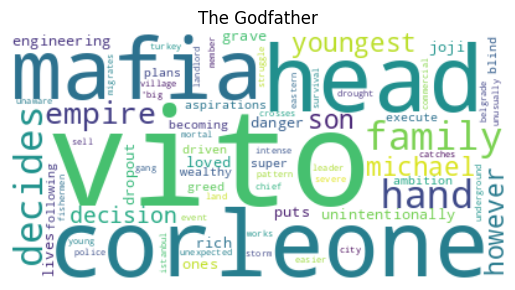

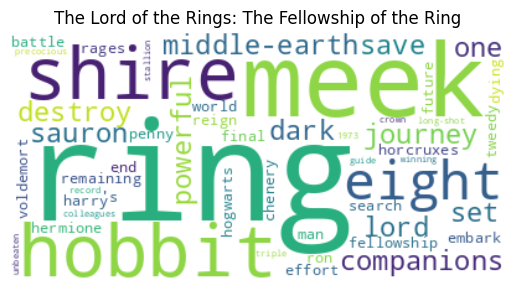

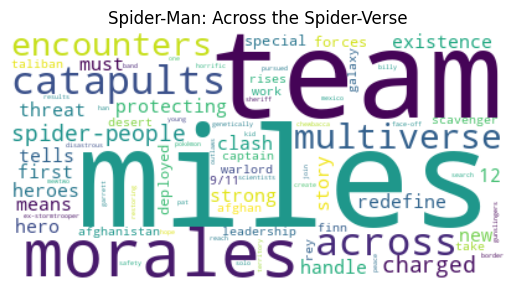

In [43]:
for grupo in grupos:
    todas_frequencias = {}
    for filme in grupo:
        todas_frequencias.update(dataset[dataset['Movie Name'] == filme].iloc[0].freq_tokens)

    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(frequencies=todas_frequencias)
    plt.figure()
    plt.title(grupo[0])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()